## 使用Selenium 抓取網頁

In [1]:
! pip install selenium

### 下載並解壓縮下列軟體
- https://addons.mozilla.org/en-US/firefox/addon/selenium-ide/
- https://github.com/mozilla/geckodriver/releases
- https://sites.google.com/a/chromium.org/chromedriver/

### 華納威休自動訂票

In [2]:
# -*- coding: utf-8 -*-
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
import unittest, time, re

driver = webdriver.Chrome()
driver.implicitly_wait(30)
base_url = "http://web.vscinemas.com.tw/"
verificationErrors = []
accept_next_alert = True


driver.get(base_url)
Select(driver.find_element_by_name("cinema")).select_by_visible_text(u"台北信義威秀影城")
Select(driver.find_element_by_name("movie")).select_by_visible_text(u"(3D 數位)星際異攻隊 2")
Select(driver.find_element_by_name("date")).select_by_visible_text(u"2017/05/04(四)")
Select(driver.find_element_by_name("session")).select_by_visible_text("18:30")
driver.find_element_by_css_selector("input[type=\"button\"]").click()
driver.find_element_by_css_selector("a.icon-vsgeneral").click()
driver.find_element_by_name("agree").click()
driver.find_element_by_css_selector("input[type=\"submit\"]").click()
Select(driver.find_element_by_id("HO000007610913")).select_by_visible_text("2")
Select(driver.find_element_by_id("HO000007610913")).select_by_visible_text("0")
Select(driver.find_element_by_id("HO000007990938")).select_by_visible_text("2")
driver.find_element_by_id("btnDoNext").click()



In [3]:
driver.get('http://largitdata.com')

In [4]:
driver.close()

### 抓取元大頁面

In [6]:
# -*- coding: utf-8 -*-
from selenium import webdriver
from bs4 import BeautifulSoup
import unittest, time, re

driver = webdriver.Chrome()
driver.implicitly_wait(30)
driver.get("http://justdata.yuanta.com.tw/z/zk/zk00-f.asp")

soup = BeautifulSoup(driver.page_source)
print(soup)

driver.close()



<html xmlns="http://www.w3.org/1999/xhtml"><head>
<meta content="text/html;CHARSET=big5" http-equiv="Content-Type"/>
<title>MoneyDJ─選股大師</title>
<meta content="Web Jun 30 08:15:04 1999 GMT" http-equiv="Expires"/>
<script language="javascript">&lt;!--
var sWhoAmI = 'SWCF';
var sStklistAll ;
if (typeof(top.frames['menu']) != "undefined") {
	if (top.frames['menu'].location.href.indexOf("zksubmenu_0.asp.htm") &gt; -1 )
		top.frames['menu'].location.href = '/z/zk/zk0/zksubmenu_7.asp.htm';
}
//--&gt;</script>
</head>
<frameset border="0" frameborder="0" framespacing="0" rows="0,*">
<frame marginheight="8" marginwidth="0" name="up@just" noresize="" scrolling="auto" src="/z/zk/zkf/HiddenFrame.htm"/>
<frame marginheight="8" marginwidth="0" name="down@just" noresize="" scrolling="auto" src="/z/zk/zkf/zkExpert_F.asp"/>
</frameset>
<noframes>
  &lt;body&gt;
  &lt;/body&gt;
  </noframes>
</html>


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


### 抓取Maincoin 圖表

In [31]:
# -*- coding: utf-8 -*-
from selenium import webdriver

driver = webdriver.Chrome()
driver.implicitly_wait(30)
driver.get("https://www.maicoin.com/zh-TW/charts/eth")

cookies = driver.get_cookies()
page = driver.page_source
driver.close()



In [26]:
ary = []
for c in cookies:
    ary.append('{}={}'.format(c['name'], c['value'] ))
';'.join(ary)

'_twcoin_session=SktISWljWVUrT1JFQkJWYVNRMGhCcVFyc2V0V2lQeDAyNi84Um5BbzQ2cnVuRXAxMEdFQWxMWlRVWXZ3L1V2aE4yK0VmZ2ZhVGxldkwyRW1XY0Z5UGpUU3NScStacUlsSlpucG5NS2ZMT1ZPeXpZZXlXOXhOQlhsYTJ1eWxIaDBTSURBenk1a3F2OE53NU1saGtSODV3PT0tLWlXTnJJQ3dSL0NDYURCbXFkODl6S1E9PQ%3D%3D--c0f1ab637220de9af736b204a7da3ffce7eb3700;visid_incap_160122=MMdllGpxS8GHHwxUFs9sfTyBBVkAAAAAQUIPAAAAAADmmjkHBKntL/DXk2Eqym2O;incap_ses_401_160122=QqLubFi5Uxrcqs7ga6SQBTyBBVkAAAAAK/A4lenvugcnwj8/B+i62w==;currency=InR3ZCI%3D--6eec4eff818e386526edfcc1b4af684de0367230;_gat=1;_ga=GA1.2.838986848.1493532991;locale=InpoLVRXIg%3D%3D--a65135f98901cde92d397aef024641fac25550a3'

In [39]:
token = ';'.join(['{}={}'.format(c['name'], c['value'] ) for c in cookies])

In [40]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, 'html.parser')
csrf_token = soup.select('meta[name==csrf-token]')[0]['content']
csrf_token

'S28X0dLRBS1Zyct45VCtPWw6sEoNOraV/cZ3poFIU8HpEcfLk88SE7p4eF8LCqH0RaDSgJ6GGd9Ml7XAO8NbtA=='

In [42]:
import requests
url = 'https://www.maicoin.com/zh-TW/trade_summaries/eth?from=2016-10-30+12%3A28%3A36+%2B0800'
headers = {
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',    
'X-CSRF-Token':csrf_token,
'X-Requested-With':'XMLHttpRequest',
'Cookie': token
#'Cookie':'visid_incap_160122=A4M8eBbASIaPyLW3MJIJYNgCmFgAAAAAQUIPAAAAAAA7/GYrbtr5cmWspDT0H104; incap_ses_406_160122=nZjQBKxLIWmLw8xOwmiiBSms/VgAAAAA0m4czHtPg0qs2V4fifg5GQ==; _okdetect=%7B%22token%22%3A%2214930196967490%22%2C%22proto%22%3A%22https%3A%22%2C%22host%22%3A%22www.maicoin.com%22%7D; _ok=2909-208-10-2973; incap_ses_576_160122=Lih9QmR8Bg+J0R5VIV3+B2Su/VgAAAAAFUCyE9XInLZ6KGqR1t+wHg==; _okac=2dc9c7c45a697160aa9a474371086c3f; _okla=1; _hjIncludedInSample=1; incap_ses_200_160122=lVvIE8D05jIxARGNRIvGAmSC/1gAAAAAUCJpluS0XIucsgAadH2mTw==; _hjMinimizedPolls=50467; last_sign_in_at=2017-04-29+21%3A21%3A21+%2B0800; _okbk=cd4%3Dtrue%2Cvi5%3D0%2Cvi4%3D1493478210836%2Cvi3%3Dactive%2Cvi2%3Dfalse%2Cvi1%3Dfalse%2Ccd8%3Dchat%2Ccd6%3D0%2Ccd5%3Daway%2Ccd3%3Dfalse%2Ccd2%3D0%2Ccd1%3D0%2C; olfsk=olfsk5239368130145221; wcsid=2oAH2ywU6fYUhMzF3Z2JK0H8RE0PPobT; hblid=WFEmWdozZE4GfEAz3Z2JK5u1CH3RE0O6; _oklv=1493479241401%2C2oAH2ywU6fYUhMzF3Z2JK0H8RE0PPobT; incap_ses_627_160122=kATPYGYslUGAuJ/fRI2zCOUNBVkAAAAAeW5uFiLXoEawbI5gCmO29g==; incap_ses_401_160122=VFphQTzanTK4Hanga6SQBa5nBVkAAAAAark7up57FDFpElkuB+YPeg==; locale=InpoLVRXIg%3D%3D--a65135f98901cde92d397aef024641fac25550a3; currency=InR3ZCI%3D--6eec4eff818e386526edfcc1b4af684de0367230; _twcoin_session=RUtHZm9ZdnlXdjhnWjZGVkZVcm1nZC9HU3dVUU9OcTQ4UldSUXhhQTJnb1ZyQnVqSGNJbHo2SHBLUEhYUzFtWEltcEswajJiNE9ueXEwWHNudHVacnVaeTYyS0VjME1hL2hNYjlrQzZNZVRtd25pcUl6NVFUQjBlaW55aTBsaXRJS2VsNFhNUmxOaWpSdENLU0lpZ3hBPT0tLUFYb1FOaXNxczEraFpTUG5nTVRWMFE9PQ%3D%3D--6285e1cd54e1a4dccb638137c0497b2c00f19363; _ga=GA1.2.896472302.1486357208; _gat=1'
}
payload = {'from':'2016-10-30 12:28:36 +0800'}
res = requests.post(url , data = payload, headers = headers)
#print(res.text)

## 分點買賣日報表

In [66]:
import requests
from bs4 import BeautifulSoup
rs  = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
soup = BeautifulSoup(res.text, 'html.parser')

In [67]:
captcha = soup.select('img')[1]['src']

In [68]:
captuaurl = 'http://bsr.twse.com.tw/bshtm/' + captcha
with open('captua.jpg', 'wb') as f:
    res2 = rs.get(captuaurl)
    f.write(res2.content)

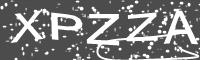

In [69]:
from PIL import Image
Image.open('captua.jpg')

In [75]:
payload  = {    
'RadioButton_Normal':'RadioButton_Normal',
'TextBox_Stkno':'5478',
'CaptchaControl1':'XPZZA',
'btnOK':'查詢',    
}
for item in soup.select('input[type==hidden]'):
    payload[item['name']] = item['value']

In [76]:
payload

{'CaptchaControl1': 'XPZZA',
 'RadioButton_Normal': 'RadioButton_Normal',
 'TextBox_Stkno': '5478',
 '__EVENTVALIDATION': '/wEdAAbw6v8h+/UTSWOa5LLmhb17fMmuxAJNAJcNkRRsVeJwwqKURZav/+YrVMqaWE2hvMxJwK4Ohf3nRgXHkFhQen1PRSciNdPYWmINCrip1wqw01PJCA0uL9aE2sjICZqv6GriBM2Ryg2lq58J1IAB+Azq',
 '__VIEWSTATE': '/wEPDwUJOTAxMjkxMjg3D2QWAgIDD2QWBAIBD2QWAmYPZBYEZg9kFgJmDxAPFgYeB0NoZWNrZWRnHglGb3JlQ29sb3IKAB4EXyFTQgIEZGRkZAIBD2QWAgIBDw8WBB8BCgAfAgIEZGQCAw9kFgQCAw8PFgIeBFRleHRlZGQCCQ8PFgIeB1Zpc2libGVoZGQYAgUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgMFElJhZGlvQnV0dG9uX05vcm1hbAUQUmFkaW9CdXR0b25fRXhjZAUQUmFkaW9CdXR0b25fRXhjZAUPQ2FwdGNoYUNvbnRyb2wxDwUkNTM1ODY5MzAtYmQ1NS00Mjg2LThiN2YtNzk4MjVjZWYyMmQ4ZKagd2f5IOzBkOurd9saMV8=',
 'btnOK': '查詢'}

In [79]:
res3 = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data = payload)

In [80]:
import requests
res4 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx?v=t')
res4.text

''

## 正確版本

In [97]:
import requests
from bs4 import BeautifulSoup
rs  = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
soup = BeautifulSoup(res.text, 'html.parser')

In [98]:
payload  = {    
'RadioButton_Normal':'RadioButton_Normal',
'TextBox_Stkno':'2353',
#'CaptchaControl1':'XPZZA',
'btnOK':'查詢',    
}
for item in soup.select('input[type==hidden]'):
    payload[item['name']] = item['value']

In [99]:
res3 = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data = payload)

In [101]:
import requests
#http://bsr.twse.com.tw/bshtm/bsContent.aspx
res4 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx')
with open('2353.csv', 'w') as f:
    f.write(res4.text)

## 櫃買中心

In [107]:
import requests
payload = {
'enname':'%9Ah%B37%1B%C1T6%BA%0A%F9%D9%05%9AW%A1',
'stk_code':'1259',
'auth_num':'D9JIG',    
}
res = requests.post('http://www.tpex.org.tw/web/stock/aftertrading/broker_trading/brokerBS.php?l=zh-tw', data = payload)
res.encoding = 'utf-8'
#res.text

In [105]:
with open('1259.csv', 'wb') as f:
    res = requests.get('http://www.tpex.org.tw/web/stock/aftertrading/broker_trading/download_ALLCSV.php?curstk=1259&stk_date=1060428&auth=D9JIG&n=%9Ah%B37%1B%C1T6%BA%0A%F9%D9%05%9AW%A1')
    f.write(res.content)

In [106]:
with open('4120.csv', 'wb') as f:
    res = requests.get('http://www.tpex.org.tw/web/stock/aftertrading/broker_trading/download_ALLCSV.php?curstk=4120&stk_date=1060428&auth=D9JIG&n=%9Ah%B37%1B%C1T6%BA%0A%F9%D9%05%9AW%A1')
    f.write(res.content)